<a href="https://colab.research.google.com/github/teahibiscus/general-project-fall25/blob/main/GenProj_EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [13]:
import kagglehub
import pandas as pd
import os
import numpy as np

path = kagglehub.dataset_download("paultimothymooney/chest-xray-pneumonia")
print("Path to dataset files: ", path)

Using Colab cache for faster access to the 'chest-xray-pneumonia' dataset.
Path to dataset files:  /kaggle/input/chest-xray-pneumonia


In [4]:
# making the dataframe?
rows = []
sub_paths = []
for folder_name in os.listdir(path):
    subfolder_path = os.path.join(path, folder_name)

    if os.path.isdir(subfolder_path):
      for sub_sub_name in os.listdir(subfolder_path):
        # don't know what macosx and chest-xray are (not included on website),
        # so I won't store those paths
        if (sub_sub_name == "chest_xray" or sub_sub_name == "__MACOSX"): continue
        sub_sub_path = os.path.join(subfolder_path, sub_sub_name)
        sub_paths.append(sub_sub_path)
        for split in ['NORMAL', "PNEUMONIA"]:
            split_path = os.path.join(sub_sub_path, split)
            for filename in os.listdir(split_path):
              file_path = os.path.join(split_path, filename)
              if filename.endswith((".jpg", ".png", ".jpeg")):
                  rows.append({
                      "filepath": file_path,
                      "label": sub_sub_name,
                      "split": split
                  })
      # now to organize everything into dataframe?

df = pd.DataFrame(rows)

In [11]:
# simple stuff

print(df.tail())
print("Total samples:", len(df))



                                               filepath  label      split
5851  /kaggle/input/chest-xray-pneumonia/chest_xray/...  train  PNEUMONIA
5852  /kaggle/input/chest-xray-pneumonia/chest_xray/...  train  PNEUMONIA
5853  /kaggle/input/chest-xray-pneumonia/chest_xray/...  train  PNEUMONIA
5854  /kaggle/input/chest-xray-pneumonia/chest_xray/...  train  PNEUMONIA
5855  /kaggle/input/chest-xray-pneumonia/chest_xray/...  train  PNEUMONIA
Total samples: 5856


In [12]:
df['split'].value_counts(normalize=True)


,proportion
split,
PNEUMONIA,0.729679
NORMAL,0.270321


In [9]:
df['label'].value_counts(normalize=True)


,proportion
label,
train,0.890710
test,0.106557
val,0.002732


In [43]:
df.info()
df.isnull().sum()
# no nulls lol

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5856 entries, 0 to 5855
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   filepath  5856 non-null   object
 1   label     5856 non-null   object
 2   split     5856 non-null   object
dtypes: object(3)
memory usage: 137.4+ KB


,0
filepath,0
label,0
split,0


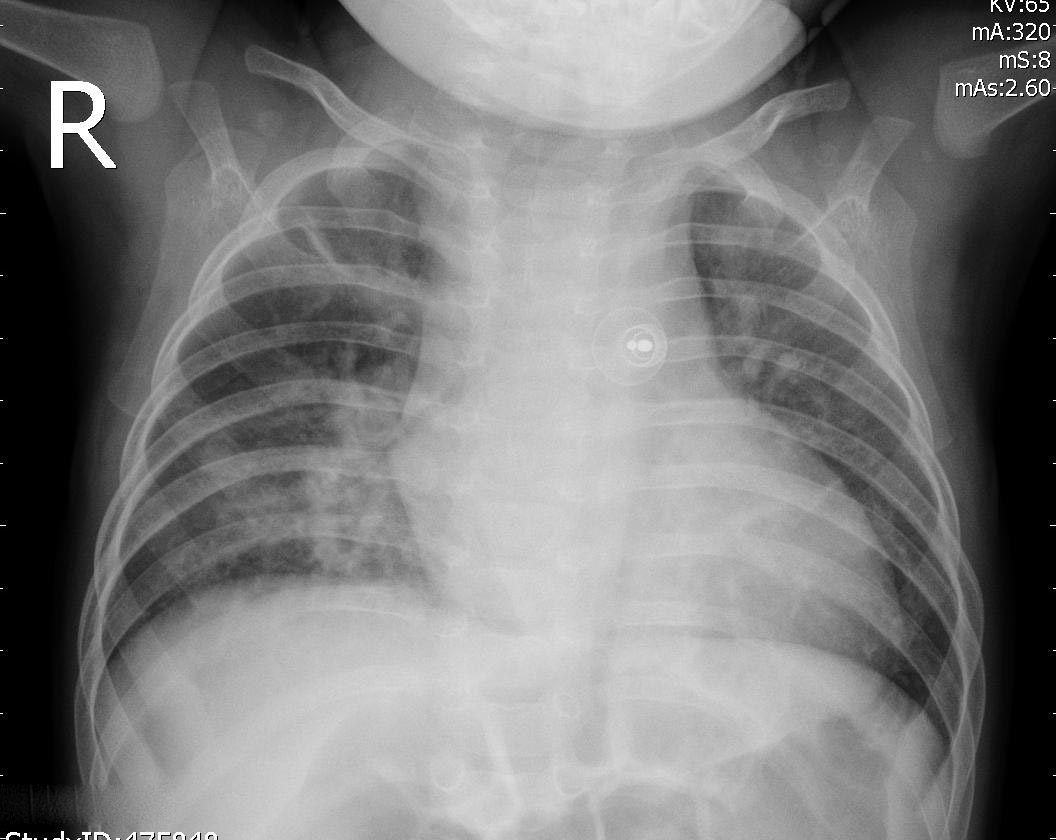

In [42]:
from PIL import Image
from IPython.display import display

pneu_entry = df[df['split'] == 'PNEUMONIA'].iloc[100]
img = Image.open(pneu_entry.filepath)
display(img)

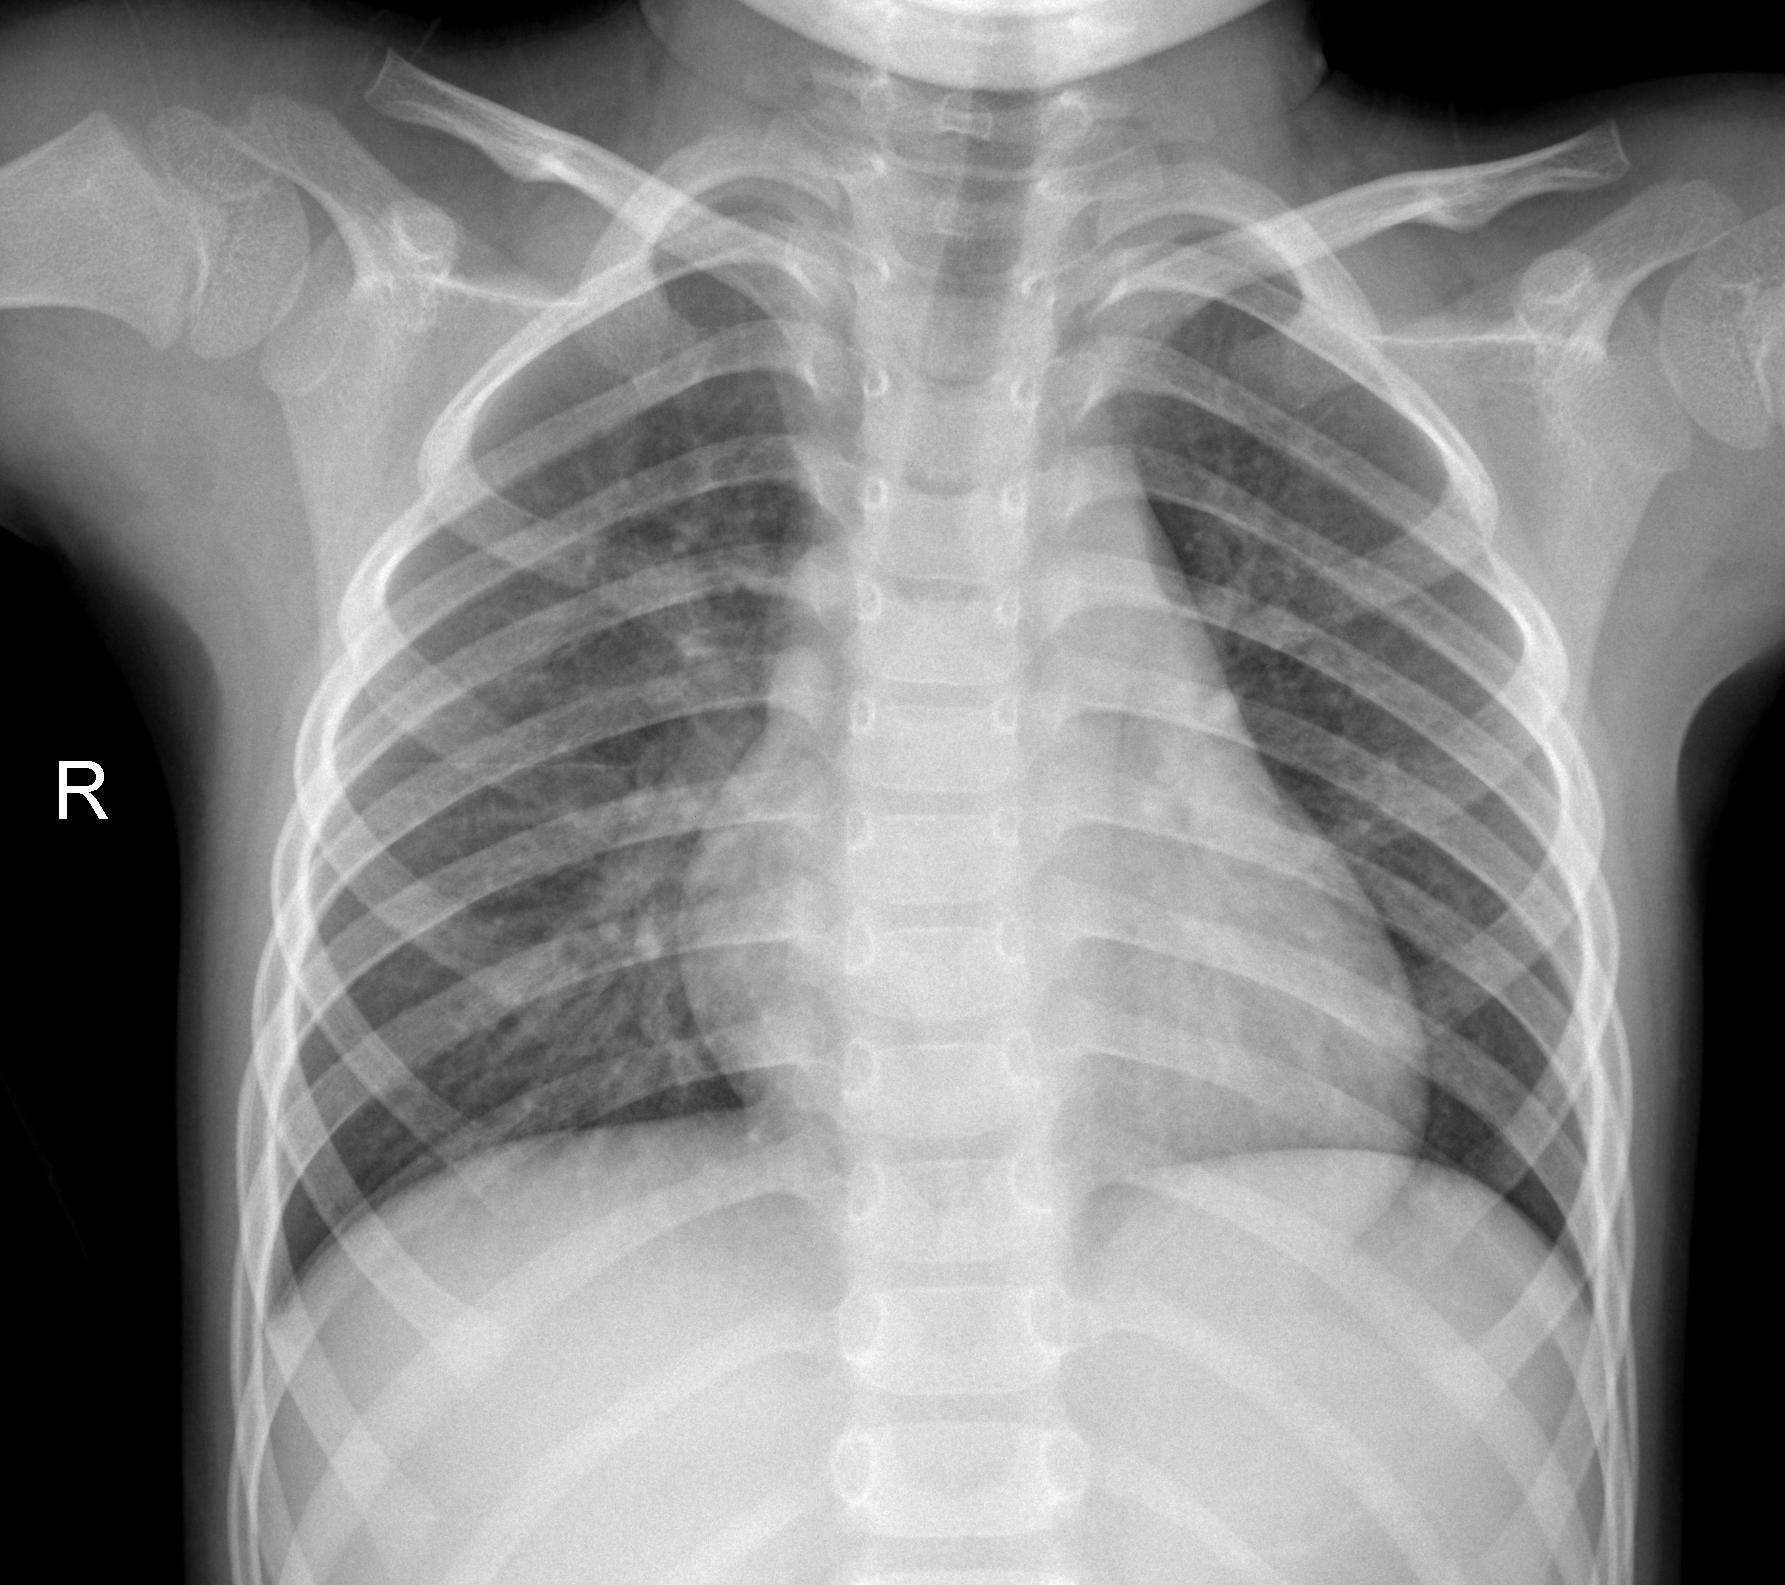

In [41]:
pneu_entry = df[df['split'] == 'NORMAL'].iloc[50]
img = Image.open(pneu_entry.filepath)
display(img)

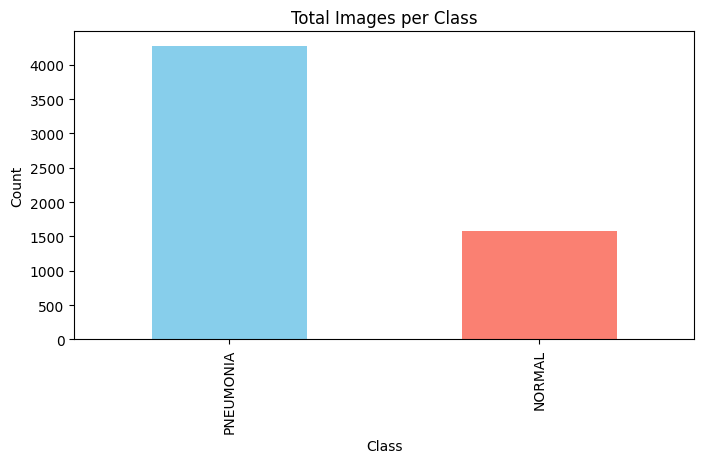

In [20]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8,4))
df['split'].value_counts().plot(kind='bar', color=['skyblue', 'salmon'])
plt.title("Total Images per Class")
plt.xlabel("Class")
plt.ylabel("Count")
plt.show()